In [1]:
# !pip install nbformat

In [2]:
import os
import pandas as pd
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
metrics, cv_metrics = {}, {}

2023-12-26 18:09:54.243246: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-26 18:09:54.243270: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Remove seasonality (normalize by intraday averaging)

In [3]:
REMOVE_SEASONALITY = True
PLOT_CHARTS = True

/home/otestov/code/ml/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Feature Importance: model is not specified, using CatBoostRegressor


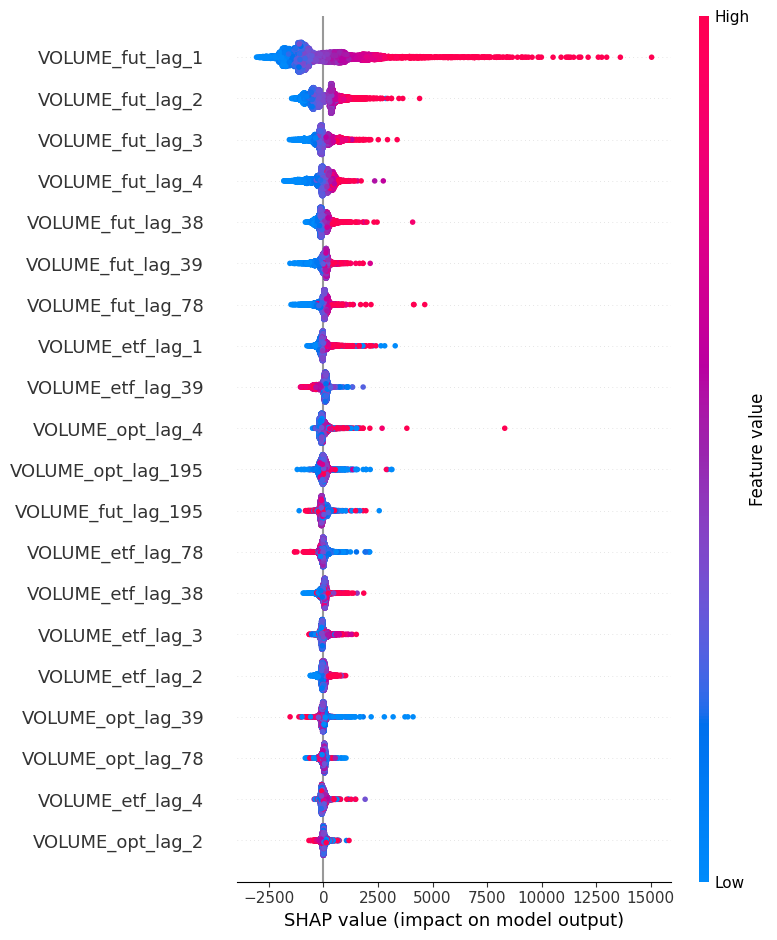

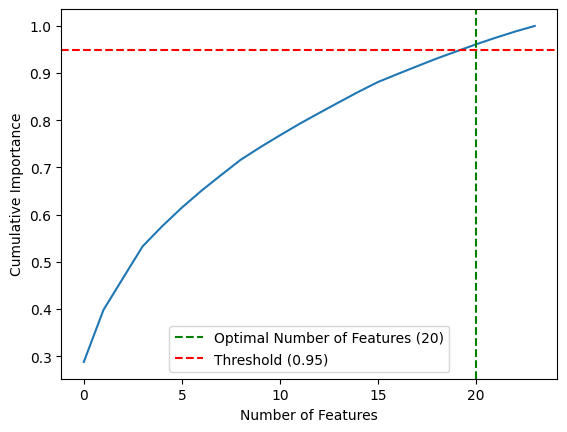

Training xgboost...
Best mean test score: -2095.3146870924047
Training catboost...
Best mean test score: -2084.7287588590443
Training cascadeforest...
Best mean test score: -2116.1858396588377
Training dnn...


2023-12-26 18:15:59.327189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-26 18:15:59.327215: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-26 18:15:59.327232: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dev-host-1.eng.sol.onetick.com): /proc/driver/nvidia/version does not exist
2023-12-26 18:15:59.327463: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Best mean test score: -2093.9948275404163


In [4]:
%run experiment.ipynb

In [5]:
cv_metrics_ia = cv_metrics
cv_metrics_ia['approach'] = 'IA'
cv_metrics_ia = cv_metrics_ia.loc[cv_metrics_ia.groupby('model')['mean_test_MAE'].idxmin()].drop('params', axis=1)
cv_metrics_ia

,mean_test_MAE,std_test_MAE,mean_test_MAPE,std_test_MAPE,mean_test_R2,std_test_R2,model,approach
11,2116.185840,270.968514,0.207198,0.014198,0.811471,0.034816,cascadeforest,IA
4,2084.728759,248.005066,0.203556,0.013405,0.816776,0.031629,catboost,IA
15,2093.994828,255.019984,0.205614,0.013267,0.816271,0.031702,dnn,IA
0,2095.314687,256.317563,0.203795,0.013330,0.815333,0.031420,xgboost,IA


In [6]:
metrics_ia = pd.DataFrame(metrics).T
metrics_ia.index += '_ia'
metrics_ia

,R2,MAE,MAPE
baseline_ia,0.691650,2570.732538,0.211903
xgboost_ia,0.762119,2217.765141,0.187981
catboost_ia,0.765567,2212.702670,0.186853
cascadeforest_ia,0.762658,2208.108264,0.184312
dnn_ia,0.768390,2222.212011,0.187696


# Consider intraday seasonality by adding a time feature

In [7]:
REMOVE_SEASONALITY = False
PLOT_CHARTS = True

Feature Importance: model is not specified, using CatBoostRegressor


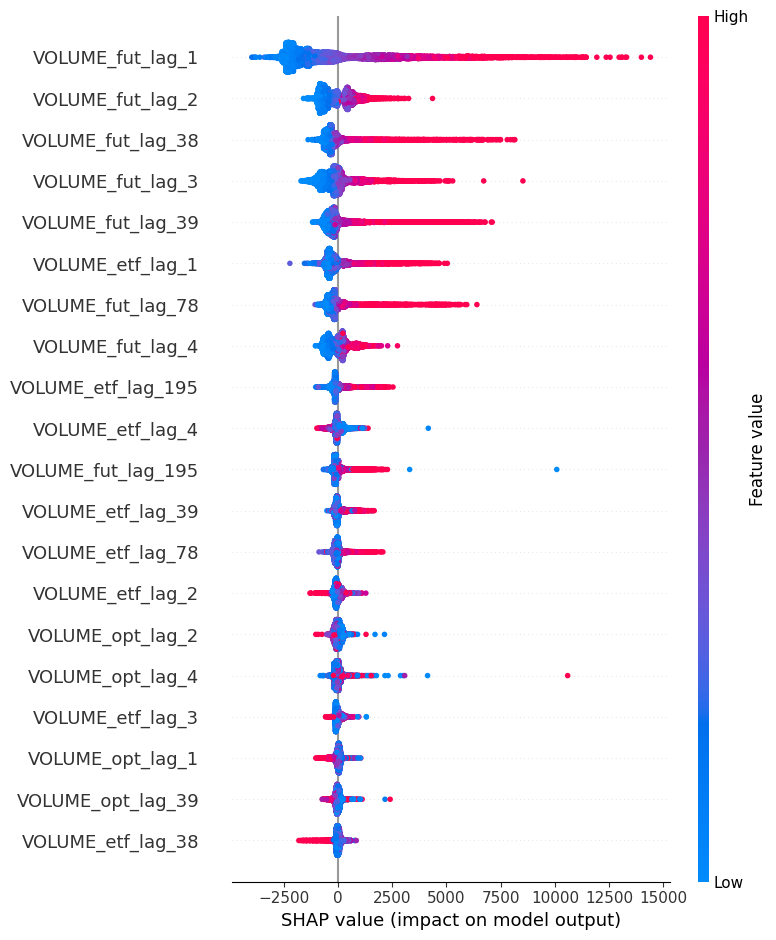

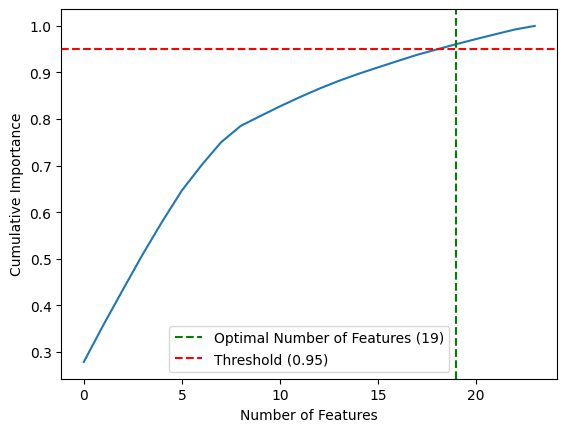

Training xgboost...
Best mean test score: -2102.8821268684683
Training catboost...
Best mean test score: -2090.109464255917
Training cascadeforest...
Best mean test score: -2309.2729620348155
Training dnn...
Best mean test score: -2430.685082505845


In [8]:
%run experiment.ipynb

In [9]:
cv_metrics_hhmm = cv_metrics
cv_metrics_hhmm['approach'] = 'HHMM'
cv_metrics_hhmm = cv_metrics_hhmm.loc[cv_metrics_hhmm.groupby('model')['mean_test_MAE'].idxmin()].drop('params', axis=1)
cv_metrics_hhmm

,mean_test_MAE,std_test_MAE,mean_test_MAPE,std_test_MAPE,mean_test_R2,std_test_R2,model,approach
10,2309.272962,383.601330,0.231296,0.018899,0.775431,0.046527,cascadeforest,HHMM
7,2090.109464,272.160021,0.204416,0.013071,0.808253,0.033676,catboost,HHMM
14,2430.685083,418.152321,0.239788,0.013780,0.754920,0.041294,dnn,HHMM
2,2102.882127,267.379287,0.205972,0.014440,0.805832,0.029785,xgboost,HHMM


In [10]:
metrics_hhmm = pd.DataFrame(metrics).T
metrics_hhmm.index += '_hhmm'
metrics_hhmm

,R2,MAE,MAPE
baseline_hhmm,0.632815,2708.410152,0.216764
xgboost_hhmm,0.785188,2095.085004,0.176797
catboost_hhmm,0.785771,2116.219067,0.178278
cascadeforest_hhmm,0.733879,2391.534789,0.206458
dnn_hhmm,0.706914,2479.039891,0.210136


# Comparison

In [11]:
pd.concat([cv_metrics_ia, cv_metrics_hhmm]).sort_values('mean_test_MAE')

,mean_test_MAE,std_test_MAE,mean_test_MAPE,std_test_MAPE,mean_test_R2,std_test_R2,model,approach
4,2084.728759,248.005066,0.203556,0.013405,0.816776,0.031629,catboost,IA
7,2090.109464,272.160021,0.204416,0.013071,0.808253,0.033676,catboost,HHMM
15,2093.994828,255.019984,0.205614,0.013267,0.816271,0.031702,dnn,IA
0,2095.314687,256.317563,0.203795,0.013330,0.815333,0.031420,xgboost,IA
2,2102.882127,267.379287,0.205972,0.014440,0.805832,0.029785,xgboost,HHMM
11,2116.185840,270.968514,0.207198,0.014198,0.811471,0.034816,cascadeforest,IA
10,2309.272962,383.601330,0.231296,0.018899,0.775431,0.046527,cascadeforest,HHMM
14,2430.685083,418.152321,0.239788,0.013780,0.754920,0.041294,dnn,HHMM


In [12]:
pd.concat([metrics_ia,metrics_hhmm]).sort_values('MAE')

,R2,MAE,MAPE
xgboost_hhmm,0.785188,2095.085004,0.176797
catboost_hhmm,0.785771,2116.219067,0.178278
cascadeforest_ia,0.762658,2208.108264,0.184312
catboost_ia,0.765567,2212.702670,0.186853
xgboost_ia,0.762119,2217.765141,0.187981
dnn_ia,0.768390,2222.212011,0.187696
cascadeforest_hhmm,0.733879,2391.534789,0.206458
dnn_hhmm,0.706914,2479.039891,0.210136
baseline_ia,0.691650,2570.732538,0.211903
baseline_hhmm,0.632815,2708.410152,0.216764
